In [1]:
#random code from earlier
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

SyntaxError: invalid syntax (<ipython-input-1-2e4bb11bde84>, line 2)

In [1]:
library(DESeq2)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Attaching package: ‘S4Vectors’

The followin

In [2]:
#loading the raw counts table
yi_bulk_seq <- read.table('/Volumes/Untitled/mTEC_scRNA-selected/counts.STAR.MOUSE.txt',header = TRUE,row.names = 1)

In [3]:
#getting rid of KO 4 and C311Y 3 as suggested by Joshua/core
yi_bulk_seq_clean <- subset(yi_bulk_seq,select = -c(KO_4,C311Y_3))

In [4]:
#need to add conditions table to match with columns found in counts.STAR.MOUSE.txt
conditions <- read.table('/Volumes/Untitled/mTEC_scRNA-selected/conditions.csv',header = TRUE,row.names = 1,sep = ',')

In [5]:
#this is how it should look when loaded
conditions

,condition
,<fct>
G288W_3,G288W
C311Y_2,C311Y
G288W_1,G288W
WT_4,WT
WT_3,WT
WT_1,WT
C311Y_1,C311Y
G288W_4,G288W
G288W_2,G288W


In [5]:
#conversion to DESeqDataSet object
dds <- DESeqDataSetFromMatrix(countData = yi_bulk_seq_clean,
                              colData = conditions,
                              design = ~ condition)

In [6]:
#removing any row (gene) with less than 10 counts
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

In [8]:
dds

class: DESeqDataSet 
dim: 34061 13 
metadata(1): version
assays(1): counts
rownames(34061): ENSMUSG00000000001 ENSMUSG00000000003 ...
  ENSMUSG00000118391 ENSMUSG00000118392
rowData names(0):
colnames(13): G288W_3 C311Y_2 ... WT_2 C311Y_4
colData names(1): condition

In [7]:
#DESeq pipeline. Runs everything (correction and calculations detailed in DESeq paper) in one step.
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [22]:
#save normalized counts for things like heatmaps
write.csv(as.data.frame(counts(dds, normalized=TRUE)), 
          file="/Volumes/Untitled/mTEC_scRNA-selected/normalized_counts.csv")

In [21]:
#view normalized counts if curious
counts(dds, normalized=TRUE)

,G288W_3,C311Y_2,G288W_1,WT_4,WT_3,WT_1,C311Y_1,G288W_4,G288W_2,KO_3,KO_1,WT_2,C311Y_4
ENSMUSG00000000001,1360.345850,1940.358594,1410.667661,1197.698860,1360.8244670,1575.272337,1821.557743,1505.037493,1199.636225,2193.690850,2284.100554,1262.721599,1114.740530
ENSMUSG00000000003,0.000000,0.000000,0.000000,70.001615,0.8656644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.011796,0.000000
ENSMUSG00000000028,45.996478,15.564374,15.674085,41.233828,49.3428719,113.513846,36.620162,16.285853,2.179176,128.735698,74.256767,51.601604,79.812265
ENSMUSG00000000031,4.599648,17.639624,1.119578,43.151680,34.6265768,37.480987,0.000000,25.271152,20.702169,0.000000,0.000000,62.731361,52.623471
ENSMUSG00000000037,0.000000,5.188125,3.358733,78.631951,16.4476240,58.898694,0.000000,1.123162,18.522993,0.000000,0.000000,24.283108,22.803504
ENSMUSG00000000049,49.446214,32.166372,21.271973,59.453426,148.8942801,93.167025,60.246073,60.650765,63.196095,66.527844,138.173984,71.837527,53.500529
ENSMUSG00000000056,188.585562,215.825983,175.773669,213.840549,197.3714876,201.326444,210.270608,246.534127,223.365510,336.095211,359.064367,279.255738,324.511405
ENSMUSG00000000058,71.294542,123.477365,95.164088,61.371279,135.9093138,283.784615,248.072066,35.941194,42.493926,117.503724,270.708214,260.031611,77.181091
ENSMUSG00000000078,5623.069488,5704.861791,6120.730239,4404.348171,3288.6591287,4182.878143,5904.115174,7502.162636,9135.104551,8473.228106,7657.846589,4595.578125,4855.392271
ENSMUSG00000000085,91.992957,77.821869,110.838173,38.357049,23.3729393,54.615152,68.515142,111.193068,125.302603,68.255840,94.935867,53.625196,86.828727


In [13]:
#calculate DE of two conditions. In this case, it will be G288W as positive logFC and C311Y as negative logFC.
res <- results(dds,contrast = c('condition','G288W','C311Y'))

In [16]:
#write the DE table as a csv file for later analysis
write.csv(as.data.frame(res), 
          file="/Volumes/Untitled/mTEC_scRNA-selected/res_G288W_KO.csv")


In [15]:
#get a view of the DE. This one is G288W as positive and KO as negative logFC.
res

log2 fold change (MLE): condition G288W vs KO 
Wald test p-value: condition G288W vs KO 
DataFrame with 34061 rows and 6 columns
                            baseMean     log2FoldChange             lfcSE
                           <numeric>          <numeric>         <numeric>
ENSMUSG00000000001   1555.8963662528 -0.709371246452711 0.242707127593856
ENSMUSG00000000003  5.52915963902813                  0  4.83888332675374
ENSMUSG00000000028  51.6013082783907  -2.34816180659319 0.813805431794862
ENSMUSG00000000031  23.0727882066906    6.3009400732491  1.88020903106579
ENSMUSG00000000037  17.6352225587758   5.09972242165989  2.02177791570422
...                              ...                ...               ...
ENSMUSG00000118383  6.10220144784158  0.728487973630194  1.17350108324892
ENSMUSG00000118384 0.919338443074413  0.781190363199575  4.13098864833965
ENSMUSG00000118387  1.26467002077364  0.791977915257125  4.29371482915484
ENSMUSG00000118391  3.00908531454473   3.24664416750021  

In [19]:
#finding the gene with the lowest adjusted p value for C311Y vs WT
res[which.min(res$padj),]

log2 fold change (MLE): condition C311Y vs WT 
Wald test p-value: condition C311Y vs WT 
DataFrame with 1 row and 6 columns
                           baseMean    log2FoldChange             lfcSE
                          <numeric>         <numeric>         <numeric>
ENSMUSG00000024907 537.252096695138 -5.73536943052235 0.414758190763559
                                stat               pvalue                 padj
                           <numeric>            <numeric>            <numeric>
ENSMUSG00000024907 -13.8282246336442 1.72218650344654e-43 3.79638792819754e-39

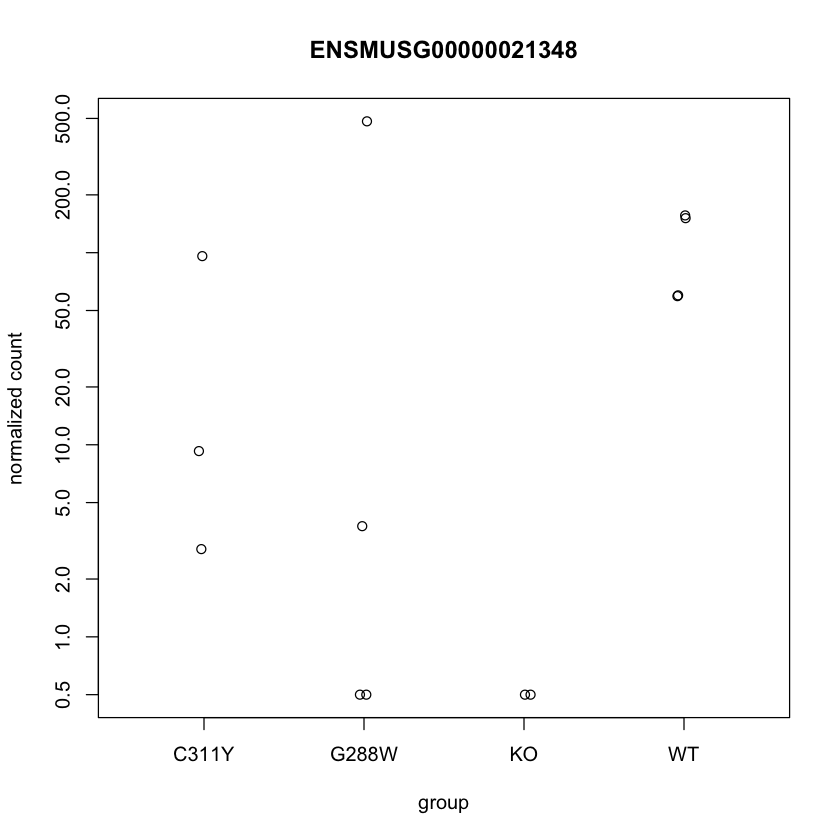

In [14]:
#plot gene. in this case it's whatever gene in 'res' has the lowest adjusted p value.
plotCounts(dds, gene=which.min(res$padj), intgroup="condition")

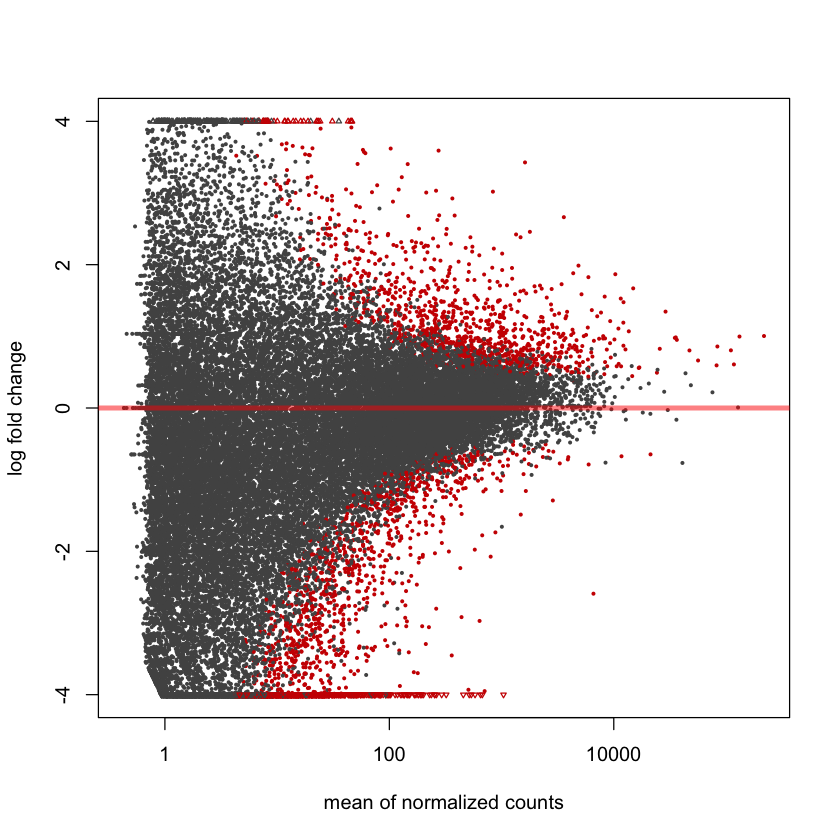

In [72]:
#MA plot. seems not that useful right now
plotMA(res, ylim=c(-4,4))